## Simple Example for Swinging Nonlinear Pendulum

To compare with the traditional perspective we: 

1. use the initial condition that the pendulum starts at rest, with an amplitude $\theta_0$. 
2. For this condition, the phase in this work is precisely $\delta = \pi/2$. 
3. For convenience, we use the form $k = \sin(\theta_0/2)$, which is equipvalent to $k = \omega_m/\omega_c$.

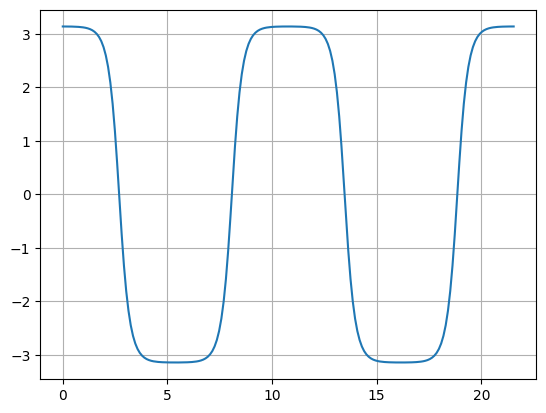

In [1]:
# exact solution of nonlinear pendulum via spectral analyis
# https://github.com/teepanis/nonlinear-pendulum
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# physics: amplitude, and OmegaL=sqrt(g/L)
theta0 = 179.9/180*np.pi
OmegaL = np.sqrt(9.8/1)

k = np.sin(theta0/2)
T = 4*sp.special.ellipk(k**2)/OmegaL
Omega0 = 2*np.pi/T
kappa = sp.special.ellipk(1-k**2)

t = np.linspace(0,2*T,200)
theta = np.zeros(len(t)) 

# set phase
delta = np.pi/2

# adding odd harmonics 
for n in range(1,40,2):
    a = 4/n/np.cosh(kappa*n*Omega0/OmegaL)
    theta = theta + a*np.sin(n*Omega0*t + n*delta)

plt.plot(t, theta)
plt.grid()
plt.show()

## Spinning Nonlinear Pendulum

1. It starts at the bottom, $\delta = 0$,
2. Its maximum angular speed $\omega_m$ is slightly above the critial value $\omega_c$. 
3. We use the the general form $k = \omega_m/\omega_c$.

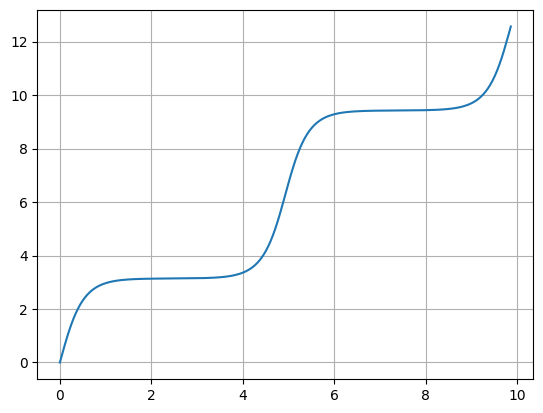

In [2]:
# exact solution of nonlinear pendulum via spectral analyis
# https://github.com/teepanis/nonlinear-pendulum
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# physics: OmegaL=sqrt(g/L)
OmegaL = np.sqrt(9.8/1)
omegac = 2*OmegaL
k = (omegac+0.00001)/omegac

T = 2/k*sp.special.ellipk(1/k**2)/OmegaL
Omega0 = 2*np.pi/T
kappa = 1/k*sp.special.ellipk(1-1/k**2)

t = np.linspace(0,2*T,200)
theta = np.zeros(len(t)) 

# set phase
delta = 0

# adding harmonics
for n in range(1,40):
    b = 2/n/np.cosh(kappa*n*Omega0/OmegaL)
    theta = theta + b*np.sin(n*Omega0*t + n*delta)

# linear term
theta = theta + Omega0*t + delta

plt.plot(t, theta)
plt.grid()
plt.show()